### Summary
Portfolio optimisation is one of the central topics in financial data analysis. The field aims to decide the weights for the given assets so as to optimise a pre-specified objective function. While there are abundance of literatures exploring different techniques for optimisation, little studies have been done with the inclusion of structure products. This project aims to study the efficient frontier of a portfolio with the inclusion of structured products. We use Callable Bull/ Bear Contracts (CBBC) as an example for illustration. We are motivated by the special characteristics of structured products distinguishable from stocks. Particularly, they have noticeable leverage effect to yield extreme return with a lower cost. Given such characteristic, we believe the variation of our possible portfolios could be efficiently enriched with the inclusion of structured products, hence effectively improving the efficient frontier.

### Background
Our study mainly focuses on HK stock market and the stocks we consider are those with large market capitalization and high trading volume in its CBBC. Based on the above criteria, we select Tecent (HK00700), MTR Corporation (HK00066) and Sun Hung Kei Property (HK00016) as our subjects. The CBBC products we consider are artificial that are not literally issued by any institutes.

For simplicity, we make the following assumptions in our study:
1. We only make an one-period investment
2. The time horizon of one-period is one month
3. We only include the structured products with their underlying assets in our choices
4. Assume the constant risk-free borrowing rate is the same as the risk-free lending rate
5. For CBBC products, we fix the fund cost, ratio and units per purchase.
6. Transaction cost is not considered

### Remarks
This work is an extract of my group project for STAT6013-Financai Data Analysis. To access the full work, please contact me in person.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import abupy
from montecarlo_simulation import Get_MeanCovariance
from naive_markowitz import efficient_frontier, get_return_matrix, covmean_portfolio

In [2]:
symbol_list = ['hk00700', 'hk00066', 'hk00016']

In [3]:
# Simulation results for (i) stocks alone - sim_ret_df_wocbbc
# and (ii) stocks with their corresponding CBBC - sim_ret_df_wcbbc
sim_ret_df_wcbbc = Get_MeanCovariance(symbol_list, 
                                                            yr_n = 1,
                                                            time_horizon= 'monthly', 
                                                            end_date = '2017-12-31')
rm_col = ['hk00016_bear_monthly', 'hk00016_bull_monthly',
              'hk00066_bear_monthly', 'hk00066_bull_monthly',
              'hk00700_bear_monthly', 'hk00700_bull_monthly']
remain_col = [header for header in list(sim_ret_df_wcbbc) if header not in rm_col]
sim_ret_df_wocbbc = sim_ret_df_wcbbc[remain_col]

Box(children=(Text(value='pid=4526 begin work'), FloatProgress(value=0.0)))

In [4]:
# Convert df to np array (mean and covariance)
mean_wcbbc = np.array(sim_ret_df_wcbbc.mean())
cov_wcbbc = np.array(sim_ret_df_wcbbc.cov())
mean_wocbbc = np.array(sim_ret_df_wocbbc.mean())
cov_wocbbc = np.array(sim_ret_df_wocbbc.cov())

In [5]:
wcbbc_wt, wcbbc_ret, wcbbc_risk, wcbbc_port_list = covmean_portfolio(cov_wcbbc, mean_wcbbc)
wocbbc_wt, wocbbc_ret, wocbbc_risk, wocbbc_port_list = covmean_portfolio(cov_wcbbc, mean_wcbbc)

     pcost       dcost       gap    pres   dres
 0: -4.4346e+02 -1.3355e+02  5e+02  3e+01  3e-01
 1: -1.5361e+01 -9.2551e+00  6e+01  2e+00  2e-02
 2: -6.7379e+00 -6.8816e+00  9e+00  2e-01  2e-03
 3: -3.9616e+00 -4.9670e+00  1e+00  8e-17  7e-16
 4: -4.5847e+00 -4.6360e+00  5e-02  2e-16  2e-16
 5: -4.6154e+00 -4.6169e+00  1e-03  2e-16  9e-17
 6: -4.6160e+00 -4.6160e+00  2e-05  1e-16  2e-16
 7: -4.6160e+00 -4.6160e+00  2e-07  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.2793e+02 -1.3367e+02  5e+02  3e+01  3e-01
 1: -1.2553e+01 -9.0386e+00  7e+01  2e+00  2e-02
 2: -6.0709e+00 -6.6034e+00  9e+00  2e-01  2e-03
 3: -3.7367e+00 -4.7612e+00  1e+00  8e-17  3e-16
 4: -4.3804e+00 -4.4228e+00  4e-02  1e-16  1e-16
 5: -4.4061e+00 -4.4073e+00  1e-03  2e-16  4e-16
 6: -4.4065e+00 -4.4066e+00  1e-05  2e-16  3e-16
 7: -4.4065e+00 -4.4065e+00  1e-07  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.1259e+02 -1.3362e

 5: -1.1979e+00 -1.2016e+00  4e-03  6e-06  7e-08
 6: -1.2009e+00 -1.2011e+00  2e-04  2e-08  3e-10
 7: -1.2011e+00 -1.2011e+00  2e-06  2e-10  3e-12
 8: -1.2011e+00 -1.2011e+00  2e-08  2e-12  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5254e+02 -9.3557e+01  2e+02  1e+01  2e-01
 1:  1.6716e+00 -6.8955e+00  6e+01  2e+00  2e-02
 2:  1.4906e+00 -2.7576e+00  1e+01  1e-01  2e-03
 3: -6.4442e-01 -1.3710e+00  1e+00  1e-02  1e-04
 4: -1.0172e+00 -1.0716e+00  7e-02  5e-04  6e-06
 5: -1.0446e+00 -1.0493e+00  5e-03  7e-06  8e-08
 6: -1.0465e+00 -1.0469e+00  5e-04  2e-16  2e-16
 7: -1.0465e+00 -1.0466e+00  3e-05  8e-17  2e-16
 8: -1.0465e+00 -1.0465e+00  3e-07  1e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4486e+02 -9.0714e+01  2e+02  1e+01  2e-01
 1: -2.2794e+00 -6.6249e+00  6e+01  2e+00  2e-02
 2:  1.0255e+00 -2.6315e+00  1e+01  2e-01  2e-03
 3: -4.8990e-01 -1.2803e+00  1e+00  1e-02  1e-04
 4: -8.6991e-01 -9.2794

 2: -1.2880e+01 -2.8032e+00  8e+00  6e-01  9e-03
 3: -3.8307e+00 -4.4570e-01  3e+00  2e-01  3e-03
 4:  7.6887e-01  6.4887e-01  5e-01  1e-02  1e-04
 5:  8.2657e-01  8.0908e-01  3e-02  3e-04  5e-06
 6:  8.2561e-01  8.2443e-01  1e-03  4e-06  6e-08
 7:  8.2501e-01  8.2491e-01  1e-04  5e-09  7e-11
 8:  8.2492e-01  8.2492e-01  3e-06  1e-11  2e-13
 9:  8.2492e-01  8.2492e-01  3e-08  1e-13  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.8174e+01 -4.7031e+01  7e+01  8e+00  1e-01
 1: -4.8357e+01 -2.1333e+01  3e+01  3e+00  4e-02
 2: -1.2128e+01 -2.7709e+00  8e+00  6e-01  9e-03
 3: -3.6788e+00 -4.2068e-01  3e+00  2e-01  3e-03
 4:  9.2189e-01  7.2108e-01  5e-01  9e-03  1e-04
 5:  9.1089e-01  8.8874e-01  4e-02  4e-04  6e-06
 6:  9.0841e-01  9.0703e-01  2e-03  5e-06  7e-08
 7:  9.0789e-01  9.0773e-01  2e-04  1e-16  1e-16
 8:  9.0780e-01  9.0778e-01  2e-05  7e-17  3e-16
 9:  9.0779e-01  9.0779e-01  1e-06  1e-16  2e-16
10:  9.0779e-01  9.0779e-01  1e-08  1e-16  1e-

 4:  2.5287e+00  2.4689e+00  5e+00  1e-01  2e-03
 5:  3.2258e+00  3.1548e+00  2e-01  3e-03  6e-05
 6:  3.2998e+00  3.2956e+00  6e-03  5e-05  1e-06
 7:  3.3008e+00  3.3007e+00  7e-05  5e-07  1e-08
 8:  3.3008e+00  3.3008e+00  7e-07  5e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2028e+01 -1.2001e+01  3e+01  4e+00  8e-02
 1: -1.1727e+01 -9.9491e+00  5e+00  9e-01  2e-02
 2: -2.9408e+00 -6.7343e-01  1e+01  5e-01  1e-02
 3: -3.3015e-01  1.0181e+00  6e+00  2e-01  4e-03
 4:  2.4602e+00  2.5643e+00  6e+00  1e-01  2e-03
 5:  3.2989e+00  3.2292e+00  2e-01  3e-03  7e-05
 6:  3.3782e+00  3.3736e+00  7e-03  5e-05  1e-06
 7:  3.3792e+00  3.3792e+00  8e-05  5e-07  1e-08
 8:  3.3792e+00  3.3792e+00  8e-07  5e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1393e+01 -1.1449e+01  3e+01  4e+00  8e-02
 1: -1.1110e+01 -9.5159e+00  5e+00  9e-01  2e-02
 2: -2.6548e+00 -5.2495e-01  1e+01  5e-01  1e-02
 3: -2.3282e-01  1.1115

 6:  4.6356e+00  4.5969e+00  4e-02  9e-05  2e-06
 7:  4.6336e+00  4.6323e+00  1e-03  7e-07  1e-08
 8:  4.6336e+00  4.6335e+00  1e-05  7e-09  1e-10
 9:  4.6336e+00  4.6336e+00  1e-07  7e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.9192e+00 -5.7052e+00  2e+01  3e+00  7e-02
 1: -4.8105e+00 -4.7071e+00  3e+00  5e-01  9e-03
 2: -1.4001e+00  7.5357e-01  5e+00  3e-01  6e-03
 3:  3.5598e-01  2.6909e+00  3e+00  2e-01  3e-03
 4:  4.5963e+00  4.1740e+00  2e+00  3e-02  5e-04
 5:  4.6260e+00  4.3254e+00  8e-01  7e-03  1e-04
 6:  4.7347e+00  4.7071e+00  3e-02  1e-04  2e-06
 7:  4.7348e+00  4.7340e+00  8e-04  1e-06  2e-08
 8:  4.7348e+00  4.7348e+00  8e-06  1e-08  2e-10
 9:  4.7348e+00  4.7348e+00  8e-08  1e-10  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.6329e+00 -5.4449e+00  2e+01  3e+00  7e-02
 1: -4.5318e+00 -4.4772e+00  3e+00  5e-01  9e-03
 2: -1.7422e+00  3.7803e-01  5e+00  3e-01  6e-03
 3:  2.5147e-01  2.5799

 9:  6.7457e+00  6.7456e+00  9e-05  8e-10  1e-11
10:  6.7457e+00  6.7457e+00  9e-07  8e-12  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5895e+00 -2.6125e+00  2e+01  3e+00  6e-02
 1: -1.5548e+00 -1.8867e+00  2e+00  4e-01  7e-03
 2:  4.1715e-01  1.5603e+00  4e+00  3e-01  5e-03
 3:  3.8849e+00  4.6119e+00  6e+00  1e-01  2e-03
 4:  6.3576e+00  5.9534e+00  7e+00  8e-02  1e-03
 5:  6.8096e+00  6.5597e+00  3e+00  3e-02  5e-04
 6:  6.5661e+00  6.2804e+00  2e+00  2e-02  3e-04
 7:  6.9589e+00  6.8526e+00  1e-01  2e-04  4e-06
 8:  6.9510e+00  6.9435e+00  7e-03  1e-07  2e-09
 9:  6.9506e+00  6.9505e+00  8e-05  1e-09  2e-11
10:  6.9506e+00  6.9506e+00  8e-07  1e-11  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4147e+00 -2.4451e+00  2e+01  3e+00  6e-02
 1: -1.3825e+00 -1.7287e+00  2e+00  4e-01  7e-03
 2:  6.1321e-01  1.7420e+00  4e+00  3e-01  5e-03
 3:  3.8298e+00  4.7882e+00  5e+00  1e-01  2e-03
 4:  6.3896e+00  6.2193

 3:  1.7868e+01  1.4388e+01  2e+01  1e-01  2e-03
 4:  2.2459e+01  1.8875e+01  3e+01  9e-02  1e-03
 5:  2.1811e+01  2.0726e+01  2e+00  4e-03  6e-05
 6:  2.1221e+01  2.1181e+01  5e-02  4e-05  6e-07
 7:  2.1204e+01  2.1204e+01  5e-04  4e-07  6e-09
 8:  2.1204e+01  2.1204e+01  5e-06  4e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.5536e+00  3.4541e+00  2e+01  3e+00  5e-02
 1:  4.5581e+00  4.0518e+00  2e+00  3e-01  5e-03
 2:  7.3128e+00  1.0626e+01  1e+00  1e-01  2e-03
 3:  1.8378e+01  1.5188e+01  2e+01  1e-01  2e-03
 4:  2.3179e+01  1.9956e+01  3e+01  9e-02  1e-03
 5:  2.2389e+01  2.1476e+01  4e+00  9e-03  1e-04
 6:  2.2278e+01  2.2179e+01  1e-01  6e-05  1e-06
 7:  2.2253e+01  2.2251e+01  2e-03  6e-07  1e-08
 8:  2.2253e+01  2.2253e+01  2e-05  6e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.9028e+00  3.8029e+00  2e+01  3e+00  5e-02
 1:  4.9070e+00  4.3990e+00  2e+00  3e-01  5e-03
 2:  7.6036e+00  1.1125

 3:  4.4688e+01  5.0311e+01  2e+01  1e-01  2e-03
 4:  9.3629e+01  5.3717e+01  1e+02  1e-01  2e-03
 5:  1.1112e+02  7.3312e+01  2e+02  9e-02  2e-03
 6:  9.4655e+01  8.4592e+01  2e+01  4e-03  7e-05
 7:  8.7523e+01  8.7038e+01  5e-01  1e-05  2e-07
 8:  8.7192e+01  8.7186e+01  5e-03  1e-07  2e-09
 9:  8.7188e+01  8.7188e+01  5e-05  1e-09  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.5478e+01  2.4375e+01  2e+01  3e+00  5e-02
 1:  2.5479e+01  2.4950e+01  2e+00  3e-01  5e-03
 2:  2.5525e+01  2.6971e+01  2e+00  2e-01  4e-03
 3:  4.9012e+01  5.3494e+01  2e+01  1e-01  2e-03
 4:  1.0362e+02  5.4996e+01  1e+02  1e-01  2e-03
 5:  1.2207e+02  7.5677e+01  2e+02  1e-01  2e-03
 6:  1.0116e+02  8.9022e+01  2e+01  4e-03  7e-05
 7:  9.2578e+01  9.1960e+01  6e-01  6e-06  9e-08
 8:  9.2149e+01  9.2142e+01  7e-03  6e-08  9e-10
 9:  9.2145e+01  9.2145e+01  7e-05  6e-10  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7031e+01  2.5928

 5:  3.0906e+02  2.6551e+02  3e+02  9e-02  1e-03
 6:  3.8443e+02  3.0432e+02  3e+02  5e-02  8e-04
 7:  3.7135e+02  3.3880e+02  1e+02  1e-02  2e-04
 8:  3.5355e+02  3.2573e+02  8e+01  9e-03  1e-04
 9:  3.5679e+02  3.5190e+02  5e+00  1e-04  2e-06
10:  3.5628e+02  3.5596e+02  3e-01  2e-16  4e-13
11:  3.5627e+02  3.5626e+02  3e-03  8e-17  4e-13
12:  3.5626e+02  3.5626e+02  3e-05  2e-17  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0964e+02  1.0853e+02  2e+01  3e+00  5e-02
 1:  1.0964e+02  1.0911e+02  2e+00  3e-01  4e-03
 2:  1.0965e+02  1.1080e+02  2e+00  2e-01  4e-03
 3:  2.8589e+02  2.1895e+02  3e+02  2e-01  4e-03
 4:  2.4067e+02  2.1518e+02  2e+02  1e-01  2e-03
 5:  3.3833e+02  2.7947e+02  4e+02  9e-02  1e-03
 6:  4.1506e+02  3.2114e+02  4e+02  5e-02  9e-04
 7:  3.9522e+02  3.6141e+02  1e+02  1e-02  2e-04
 8:  3.7702e+02  3.4733e+02  8e+01  8e-03  1e-04
 9:  3.7770e+02  3.7290e+02  5e+00  9e-05  1e-06
10:  3.7718e+02  3.7689e+02  3e-01  3e-08  5e-

 5: -3.5185e+00 -3.5200e+00  1e-03  5e-07  5e-09
 6: -3.5190e+00 -3.5190e+00  2e-05  5e-09  5e-11
 7: -3.5190e+00 -3.5190e+00  2e-07  5e-11  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3925e+02 -1.3064e+02  4e+02  2e+01  2e-01
 1:  2.5280e+00 -8.3483e+00  8e+01  2e+00  2e-02
 2: -2.8462e+00 -5.1049e+00  9e+00  2e-01  2e-03
 3: -2.6913e+00 -3.7030e+00  1e+00  1e-03  1e-05
 4: -3.3380e+00 -3.3904e+00  5e-02  5e-05  5e-07
 5: -3.3688e+00 -3.3707e+00  2e-03  6e-07  6e-09
 6: -3.3693e+00 -3.3693e+00  3e-05  6e-09  6e-11
 7: -3.3693e+00 -3.3693e+00  3e-07  6e-11  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.2541e+02 -1.2951e+02  3e+02  2e+01  2e-01
 1:  2.4216e+00 -8.2639e+00  9e+01  2e+00  2e-02
 2: -2.6798e+00 -4.8998e+00  9e+00  2e-01  2e-03
 3: -2.5618e+00 -3.5536e+00  1e+00  2e-03  2e-05
 4: -3.1959e+00 -3.2473e+00  5e-02  6e-05  6e-07
 5: -3.2269e+00 -3.2295e+00  3e-03  8e-07  8e-09
 6: -3.2277e+00 -3.2278

 3: -6.4442e-01 -1.3710e+00  1e+00  1e-02  1e-04
 4: -1.0172e+00 -1.0716e+00  7e-02  5e-04  6e-06
 5: -1.0446e+00 -1.0493e+00  5e-03  7e-06  8e-08
 6: -1.0465e+00 -1.0469e+00  5e-04  8e-17  1e-16
 7: -1.0465e+00 -1.0466e+00  3e-05  1e-16  2e-16
 8: -1.0465e+00 -1.0465e+00  3e-07  1e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4486e+02 -9.0714e+01  2e+02  1e+01  2e-01
 1: -2.2794e+00 -6.6249e+00  6e+01  2e+00  2e-02
 2:  1.0255e+00 -2.6315e+00  1e+01  2e-01  2e-03
 3: -4.8990e-01 -1.2803e+00  1e+00  1e-02  1e-04
 4: -8.6991e-01 -9.2794e-01  8e-02  5e-04  6e-06
 5: -8.9522e-01 -8.9873e-01  4e-03  7e-06  9e-08
 6: -8.9627e-01 -8.9633e-01  6e-05  7e-08  8e-10
 7: -8.9628e-01 -8.9628e-01  6e-07  7e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3752e+02 -8.7865e+01  1e+02  1e+01  2e-01
 1: -6.4432e+00 -6.3956e+00  5e+01  2e+00  2e-02
 2:  4.0479e-01 -2.5019e+00  1e+01  2e-01  2e-03
 3: -3.4337e-01 -1.1840

 6:  1.9594e+00  1.9577e+00  2e-03  3e-06  5e-08
 7:  1.9590e+00  1.9590e+00  2e-05  3e-08  5e-10
 8:  1.9590e+00  1.9590e+00  2e-07  3e-10  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.7100e+01 -2.4556e+01  4e+01  5e+00  9e-02
 1: -2.5951e+01 -1.8017e+01  1e+01  2e+00  3e-02
 2:  4.2486e-01 -1.7184e+00  2e+01  4e-01  7e-03
 3:  1.3753e+00  3.9549e-01  7e+00  1e-01  3e-03
 4:  2.3492e+00  1.5792e+00  1e+00  7e-03  1e-04
 5:  2.0881e+00  2.0156e+00  9e-02  3e-04  6e-06
 6:  2.0483e+00  2.0455e+00  3e-03  4e-06  6e-08
 7:  2.0470e+00  2.0469e+00  3e-05  4e-08  7e-10
 8:  2.0469e+00  2.0469e+00  3e-07  4e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.5667e+01 -2.3409e+01  4e+01  5e+00  9e-02
 1: -2.4650e+01 -1.7433e+01  1e+01  2e+00  3e-02
 2:  1.0759e+00 -1.6842e+00  2e+01  4e-01  7e-03
 3:  1.6997e+00  4.4038e-01  7e+00  2e-01  3e-03
 4:  2.4587e+00  1.6091e+00  1e+00  7e-03  1e-04
 5:  2.1821e+00  2.1022

 6:  3.2998e+00  3.2956e+00  6e-03  5e-05  1e-06
 7:  3.3008e+00  3.3007e+00  7e-05  5e-07  1e-08
 8:  3.3008e+00  3.3008e+00  7e-07  5e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2028e+01 -1.2001e+01  3e+01  4e+00  8e-02
 1: -1.1727e+01 -9.9491e+00  5e+00  9e-01  2e-02
 2: -2.9408e+00 -6.7343e-01  1e+01  5e-01  1e-02
 3: -3.3015e-01  1.0181e+00  6e+00  2e-01  4e-03
 4:  2.4602e+00  2.5643e+00  6e+00  1e-01  2e-03
 5:  3.2989e+00  3.2292e+00  2e-01  3e-03  7e-05
 6:  3.3782e+00  3.3736e+00  7e-03  5e-05  1e-06
 7:  3.3792e+00  3.3792e+00  8e-05  5e-07  1e-08
 8:  3.3792e+00  3.3792e+00  8e-07  5e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1393e+01 -1.1449e+01  3e+01  4e+00  8e-02
 1: -1.1110e+01 -9.5159e+00  5e+00  9e-01  2e-02
 2: -2.6548e+00 -5.2495e-01  1e+01  5e-01  1e-02
 3: -2.3282e-01  1.1115e+00  6e+00  2e-01  4e-03
 4:  2.4259e+00  2.6578e+00  6e+00  1e-01  2e-03
 5:  3.3755e+00  3.3024

 2: -1.4001e+00  7.5357e-01  5e+00  3e-01  6e-03
 3:  3.5598e-01  2.6909e+00  3e+00  2e-01  3e-03
 4:  4.5963e+00  4.1740e+00  2e+00  3e-02  5e-04
 5:  4.6260e+00  4.3254e+00  8e-01  7e-03  1e-04
 6:  4.7347e+00  4.7071e+00  3e-02  1e-04  2e-06
 7:  4.7348e+00  4.7340e+00  8e-04  1e-06  2e-08
 8:  4.7348e+00  4.7348e+00  8e-06  1e-08  2e-10
 9:  4.7348e+00  4.7348e+00  8e-08  1e-10  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.6329e+00 -5.4449e+00  2e+01  3e+00  7e-02
 1: -4.5318e+00 -4.4772e+00  3e+00  5e-01  9e-03
 2: -1.7422e+00  3.7803e-01  5e+00  3e-01  6e-03
 3:  2.5147e-01  2.5799e+00  3e+00  2e-01  3e-03
 4:  4.4976e+00  4.2526e+00  3e+00  4e-02  7e-04
 5:  4.7681e+00  4.5686e+00  5e-01  5e-03  9e-05
 6:  4.8394e+00  4.8277e+00  2e-02  6e-05  1e-06
 7:  4.8400e+00  4.8398e+00  2e-04  6e-07  1e-08
 8:  4.8400e+00  4.8400e+00  2e-06  6e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3590e+00 -5.1950

10:  6.7457e+00  6.7457e+00  9e-07  8e-12  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5895e+00 -2.6125e+00  2e+01  3e+00  6e-02
 1: -1.5548e+00 -1.8867e+00  2e+00  4e-01  7e-03
 2:  4.1715e-01  1.5603e+00  4e+00  3e-01  5e-03
 3:  3.8849e+00  4.6119e+00  6e+00  1e-01  2e-03
 4:  6.3576e+00  5.9534e+00  7e+00  8e-02  1e-03
 5:  6.8096e+00  6.5597e+00  3e+00  3e-02  5e-04
 6:  6.5661e+00  6.2804e+00  2e+00  2e-02  3e-04
 7:  6.9589e+00  6.8526e+00  1e-01  2e-04  4e-06
 8:  6.9510e+00  6.9435e+00  7e-03  1e-07  2e-09
 9:  6.9506e+00  6.9505e+00  8e-05  1e-09  2e-11
10:  6.9506e+00  6.9506e+00  8e-07  1e-11  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4147e+00 -2.4451e+00  2e+01  3e+00  6e-02
 1: -1.3825e+00 -1.7287e+00  2e+00  4e-01  7e-03
 2:  6.1321e-01  1.7420e+00  4e+00  3e-01  5e-03
 3:  3.8298e+00  4.7882e+00  5e+00  1e-01  2e-03
 4:  6.3896e+00  6.2193e+00  7e+00  8e-02  1e-03
 5:  6.9468e+00  6.7910

 7:  1.1862e+01  1.1861e+01  1e-03  4e-06  7e-08
 8:  1.1862e+01  1.1862e+01  1e-05  4e-08  7e-10
 9:  1.1862e+01  1.1862e+01  1e-07  4e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.2107e+00  1.2274e-01  2e+01  3e+00  6e-02
 1:  1.2214e+00  7.5240e-01  2e+00  3e-01  5e-03
 2:  3.9992e+00  5.4188e+00  4e+00  2e-01  3e-03
 3:  7.3555e+00  8.9172e+00  6e+00  1e-01  2e-03
 4:  1.0808e+01  1.1277e+01  1e+01  7e-02  1e-03
 5:  1.1976e+01  1.2007e+01  3e+00  2e-02  3e-04
 6:  1.2244e+01  1.2122e+01  5e-01  2e-03  4e-05
 7:  1.2360e+01  1.2349e+01  1e-02  2e-05  4e-07
 8:  1.2361e+01  1.2360e+01  2e-04  2e-07  4e-09
 9:  1.2361e+01  1.2361e+01  2e-06  2e-09  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4114e+00  3.2184e-01  2e+01  3e+00  6e-02
 1:  1.4213e+00  9.4809e-01  2e+00  3e-01  5e-03
 2:  4.2688e+00  5.7522e+00  4e+00  2e-01  3e-03
 3:  8.2512e+00  9.3259e+00  8e+00  1e-01  2e-03
 4:  1.1692e+01  1.1713

 6:  2.1976e+01  2.3938e+01  5e+00  2e-02  3e-04
 7:  2.5842e+01  2.5426e+01  4e-01  8e-05  1e-06
 8:  2.5788e+01  2.5758e+01  3e-02  4e-17  5e-14
 9:  2.5786e+01  2.5786e+01  3e-04  2e-16  6e-14
10:  2.5786e+01  2.5786e+01  3e-06  1e-16  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.0643e+00  4.9634e+00  2e+01  3e+00  5e-02
 1:  6.0677e+00  5.5552e+00  2e+00  3e-01  5e-03
 2:  7.2275e+00  1.0845e+01  1e+00  2e-01  3e-03
 3:  9.2011e+00  1.3589e+01  9e-01  1e-01  2e-03
 4:  1.3664e+01  1.9782e+01  5e+00  8e-02  1e-03
 5:  2.1404e+01  2.5688e+01  1e+01  5e-02  9e-04
 6:  2.2079e+01  2.4543e+01  7e+00  3e-02  4e-04
 7:  2.7115e+01  2.6621e+01  6e-01  4e-04  6e-06
 8:  2.7109e+01  2.7061e+01  5e-02  2e-16  3e-14
 9:  2.7106e+01  2.7106e+01  6e-04  8e-17  6e-14
10:  2.7106e+01  2.7106e+01  6e-06  1e-16  7e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.4937e+00  5.3926e+00  2e+01  3e+00  5e-02
 1:  6.4970e+00  5.9832

 6:  5.6131e+01  5.4114e+01  1e+01  1e-02  2e-04
 7:  5.6465e+01  5.6016e+01  5e-01  2e-05  2e-07
 8:  5.6319e+01  5.6307e+01  1e-02  2e-07  2e-09
 9:  5.6318e+01  5.6318e+01  1e-04  2e-09  2e-11
10:  5.6318e+01  5.6318e+01  1e-06  2e-11  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5782e+01  1.4679e+01  2e+01  3e+00  5e-02
 1:  1.5783e+01  1.5258e+01  2e+00  3e-01  5e-03
 2:  1.5880e+01  1.7613e+01  2e+00  2e-01  4e-03
 3:  2.5133e+01  3.2414e+01  5e+00  1e-01  2e-03
 4:  5.1503e+01  4.0440e+01  5e+01  9e-02  2e-03
 5:  6.3562e+01  5.3785e+01  8e+01  9e-02  1e-03
 6:  6.0610e+01  5.7871e+01  9e+00  8e-03  1e-04
 7:  5.9548e+01  5.9285e+01  3e-01  4e-05  7e-07
 8:  5.9446e+01  5.9442e+01  4e-03  4e-07  7e-09
 9:  5.9445e+01  5.9445e+01  4e-05  4e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6767e+01  1.5664e+01  2e+01  3e+00  5e-02
 1:  1.6768e+01  1.6242e+01  2e+00  3e-01  5e-03
 2:  1.6855e+01  1.8540

 6:  1.6371e+02  1.0417e+02  1e+02  2e-02  4e-04
 7:  1.3494e+02  1.2546e+02  9e+00  1e-16  3e-13
 8:  1.2879e+02  1.2850e+02  3e-01  1e-16  1e-13
 9:  1.2870e+02  1.2869e+02  4e-03  9e-17  1e-13
10:  1.2870e+02  1.2870e+02  4e-05  1e-16  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.8478e+01  3.7375e+01  2e+01  3e+00  5e-02
 1:  3.8478e+01  3.7948e+01  2e+00  3e-01  4e-03
 2:  3.8506e+01  3.9814e+01  2e+00  2e-01  4e-03
 3:  1.0102e+02  7.8331e+01  8e+01  1e-01  2e-03
 4:  2.7252e+02  4.1719e+00  5e+02  1e-01  2e-03
 5:  2.9800e+02  3.3303e+01  6e+02  1e-01  2e-03
 6:  1.8695e+02  9.9065e+01  1e+02  2e-02  3e-04
 7:  1.4559e+02  1.3157e+02  1e+01  2e-16  3e-13
 8:  1.3630e+02  1.3587e+02  4e-01  2e-16  2e-13
 9:  1.3611e+02  1.3611e+02  5e-03  1e-16  2e-13
10:  1.3611e+02  1.3611e+02  5e-05  1e-16  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  4.0798e+01  3.9695e+01  2e+01  3e+00  5e-02
 1:  4.0799e+01  4.0268

 8:  2.8373e+02  2.8328e+02  5e-01  2e-05  3e-07
 9:  2.8372e+02  2.8372e+02  6e-03  2e-07  3e-09
10:  2.8372e+02  2.8372e+02  6e-05  2e-09  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.6960e+01  8.5857e+01  2e+01  3e+00  5e-02
 1:  8.6960e+01  8.6427e+01  2e+00  3e-01  4e-03
 2:  8.6971e+01  8.8143e+01  2e+00  2e-01  4e-03
 3:  2.3546e+02  1.7246e+02  3e+02  2e-01  3e-03
 4:  1.6568e+02  1.5446e+02  1e+02  1e-01  2e-03
 5:  2.1877e+02  2.1645e+02  2e+02  7e-02  1e-03
 6:  3.0651e+02  2.6022e+02  1e+02  2e-02  3e-04
 7:  3.0187e+02  2.9295e+02  1e+01  8e-04  1e-05
 8:  3.0034e+02  3.0018e+02  2e-01  8e-06  1e-07
 9:  3.0032e+02  3.0032e+02  2e-03  8e-08  1e-09
10:  3.0032e+02  3.0032e+02  2e-05  8e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.2150e+01  9.1047e+01  2e+01  3e+00  5e-02
 1:  9.2150e+01  9.1617e+01  2e+00  3e-01  4e-03
 2:  9.2160e+01  9.3327e+01  2e+00  2e-01  4e-03
 3:  2.4679e+02  1.8316

11:  5.9569e+02  5.9569e+02  2e-04  4e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.8448e+02  1.8337e+02  2e+01  3e+00  5e-02
 1:  1.8448e+02  1.8394e+02  2e+00  3e-01  4e-03
 2:  1.8448e+02  1.8560e+02  2e+00  2e-01  4e-03
 3:  4.6042e+02  3.7033e+02  5e+02  2e-01  4e-03
 4:  4.1065e+02  3.6676e+02  3e+02  1e-01  2e-03
 5:  6.5455e+02  4.3736e+02  8e+02  1e-01  2e-03
 6:  7.7189e+02  5.2433e+02  1e+03  7e-02  1e-03
 7:  6.7440e+02  6.2000e+02  7e+01  1e-03  2e-05
 8:  6.4415e+02  6.1066e+02  4e+01  4e-04  7e-06
 9:  6.3095e+02  6.2946e+02  2e+00  4e-06  7e-08
10:  6.3078e+02  6.3075e+02  2e-02  4e-08  7e-10
11:  6.3078e+02  6.3078e+02  2e-04  4e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9544e+02  1.9434e+02  2e+01  3e+00  5e-02
 1:  1.9544e+02  1.9491e+02  2e+00  3e-01  4e-03
 2:  1.9545e+02  1.9656e+02  2e+00  2e-01  4e-03
 3:  4.8643e+02  3.9242e+02  6e+02  2e-01  4e-03
 4:  4.3487e+02  3.8867

### Visualization

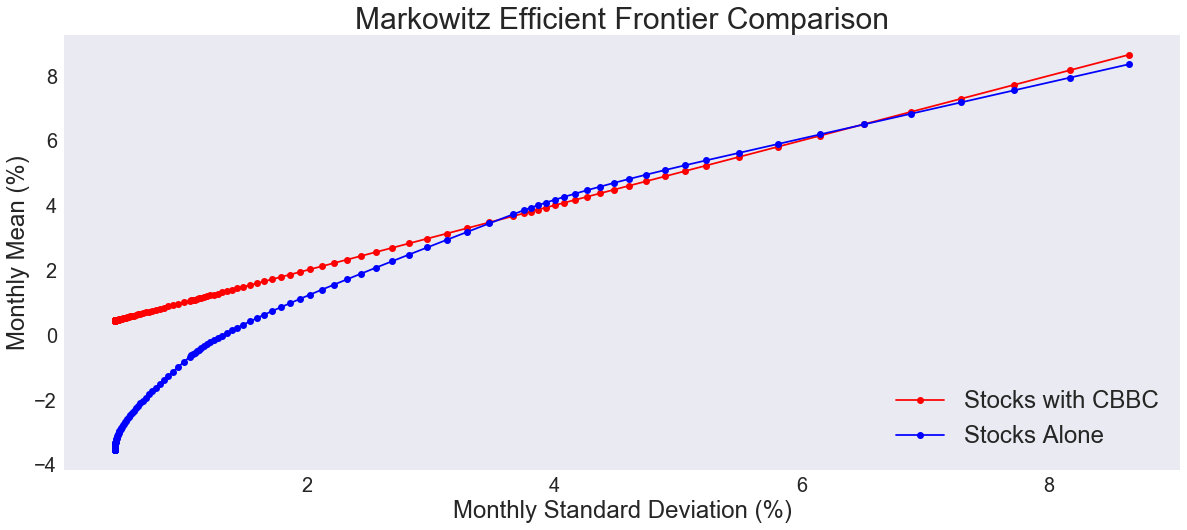

In [35]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
# Plot for efficient frontier without short-selling
ax.grid(False)
ax.plot(wcbbc_risk, wcbbc_risk, 'r-o')
ax.plot(wocbbc_risk, wocbbc_ret, 'b-o')
ax.legend(labels = ['Stocks with CBBC', 'Stocks Alone'], loc = 'lower right', fontsize = 24)
ax.set_title('Markowitz Efficient Frontier Comparison', fontdict={'fontsize': 30})
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.set_xlabel('Monthly Standard Deviation (%)', fontdict = {'fontsize': 24})
ax.set_ylabel('Monthly Mean (%)', fontdict = {'fontsize': 24});

### Conclusion

The frontier representing stocks with CBBC products is in most circumstances higher than the frontier representing stocks alone. 

It clearly shows that the portfolios with CBBC included can produce better performance mainly due to the leverage effect that the product CBBC brings. A traditional equity-only portfolio can be strengthened by incorporating assets with leverage such as CBBC. 